In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Functions to test
def eggshell(x):
    return 0.1*x[0]**2  + 0.1*x[1]**2 - np.cos(3*x[0]) - np.cos(3*x[1])

def schaffer_n2(x):
    return 0.5 + ((np.sin(x[0]**2 - x[1]**2))**2 - 0.5) / (1 + 0.001*(x[0]**2 + x[1]**2))**2

In [3]:
def sample_new_population(x_lower, x_upper, pop_size):
    pop = [np.inf]*pop_size 
    for i in range(pop_size):
        chromosome = [np.inf]*len(x_lower)
        for j in range(len(x_lower)):
            chromosome[j] = x_lower[j] + random.random()*(x_upper[j]-x_lower[j])
        pop[i] = chromosome
    return pop

def check_pop(pop, x_lower, x_upper):
    for chromosome in pop:
        for i, gene in enumerate(chromosome):
            if gene < x_lower[i]:
                chromosome[i] = x_lower[i]
            elif gene > x_upper[i]:
                chromosome[i] = x_upper[i]

def evaluate_pop(f, population):
    value = [np.inf]*len(population)
    for i, x in enumerate(population):
        value[i] = f(x)
    return value
    
def selection(f_values, population):
    # Tournament style selection
    first_shuffle = random.sample(range(0,len(population)), len(population))
    second_shuffle = random.sample(range(0,len(population)), len(population))
    new_pop = [np.inf]*len(population)
    new_values = [np.inf]*len(population)

    for i in range(0, len(population), 2):
        
        new_pop[i], new_values[i] = (population[first_shuffle[i]], f_values[first_shuffle[i]]) \
                                        if f_values[first_shuffle[i]] < f_values[first_shuffle[i+1]] else \
                                            (population[first_shuffle[i+1]], f_values[first_shuffle[i+1]]) 
        new_pop[i+1], new_values[i+1] = (population[second_shuffle[i]], f_values[second_shuffle[i]]) \
                                            if f_values[second_shuffle[i]] < f_values[second_shuffle[i+1]] else \
                                                (population[second_shuffle[i+1]], f_values[second_shuffle[i+1]])
    
    return new_pop, new_values

def crossover(f_values, pop):
    new_pop = [np.inf]*len(pop)

    for i in range(0, len(pop), 2):
        if f_values[i] < f_values[i+1]:
            p1, p2 = pop[i+1], pop[i]
        else:
            p1, p2 = pop[i], pop[i+1]

        xc1, xc2 = [np.inf]*len(p1), [np.inf]*len(p1)
        for j, (xp1, xp2) in enumerate(zip(p1, p2)):
            xc1[j] = 0.5*xp1 + 0.5*xp2
            xc2[j] = 2*xp2 - xp1

        new_pop[i] = xc1
        new_pop[i+1] = xc2
    return new_pop

def mutation(pop, mutation_prob, max_perturbation):
    for chromosome in pop:
        for i, x in enumerate(chromosome):
            if random.uniform(0, 1) < mutation_prob:
                chromosome[i] = x + (random.uniform(0, 1) - 0.5) * max_perturbation
    return pop

def genetic_algorithm(f, x_lower, x_upper, pop_size=10, MAX_K=20, mutation_prob=0.05, max_perturbation=0.1):
    k = 0
    pop = sample_new_population(x_lower, x_upper, pop_size) # will be a list of lists where each inner list contains a value for each design variable
    convergence = []
    # best_f = 100

    while k < MAX_K:
        check_pop(pop, x_lower, x_upper) # makes sure that the design variables are within bounds

        f_values = evaluate_pop(f, pop)

        # Selection
        selection_pop, selection_f_values = selection(f_values, pop)

        # Crossover
        crossover_pop = crossover(f_values, selection_pop)

        # Mutation
        pop = mutation(crossover_pop, mutation_prob, max_perturbation)

        # prev_best_f = best_f
        best_f = max(selection_f_values)
        # convergence.append(np.abs(best_f - prev_best_f))
        convergence.append(best_f)
        k += 1


    check_pop(pop, x_lower, x_upper) # makes sure that the design variables are within bounds
    f_values = evaluate_pop(f, pop)
    best_index = f_values.index(max(f_values))

    return pop[best_index], f_values[best_index], convergence


[18.437459434769984, -6.1682756134134245] 36.52928299376253
[-1.3924077710706903e-06, -1.76691507023018e-05] -1.9999999985549666
[-0.021035924134752356, 5.435649616461578e-06] -1.9979651141733
[-0.04869427014729199, -2.451083982863458e-07] -1.9891117547093917


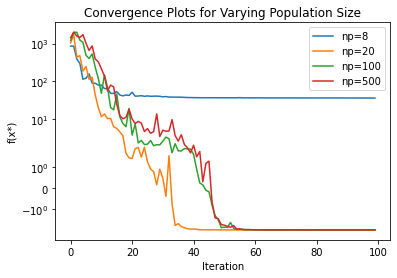

In [4]:
x_lower = [-100,-100]
x_upper = [100,100]
MAX_K=100
mutation_prob = 0.005

pop_size = 8
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'np={pop_size}')

pop_size = 20
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'np={pop_size}')

pop_size = 100
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'np={pop_size}')

pop_size = 500
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'np={pop_size}')


plt.xlabel("Iteration")
plt.ylabel("f(x*)")
plt.title(f"Convergence Plots for Varying Population Size")
plt.legend(loc="upper right")
plt.yscale('symlog')
plt.show()

[-42.05860515787039, -100] 1176.0430105618937
[22.750788142691736, 10.650310457332012] 61.59207252718778
[-0.005124254096611262, -0.02384784346534024] -1.997264196714819
[-1.6993845422223921e-06, -2.337811401637476e-06] -1.999999999961575


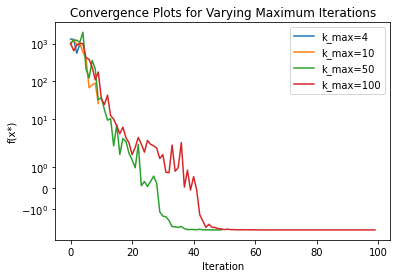

In [5]:
x_lower = [-100,-100]
x_upper = [100,100]
pop_size= 20
mutation_prob = 0.005

MAX_K = 4
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'k_max={MAX_K}')

MAX_K = 10
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'k_max={MAX_K}')

MAX_K = 50
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'k_max={MAX_K}')

MAX_K = 100
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'k_max={MAX_K}')


plt.xlabel("Iteration")
plt.ylabel("f(x*)")
plt.title(f"Convergence Plots for Varying Maximum Iterations")
plt.legend(loc="upper right")
plt.yscale('symlog')
plt.show()

[1.0136969757265172e-06, 7.171846029588487e-07] -1.999999999992907
[-7.933337605548084e-06, 1.825434019259036e-05] -1.9999999981776697
[0.018533508717114337, -0.04232167266053398] -1.9901919911258268
[-0.3069427723518799, -0.46154502112087614] -0.7595250284626883


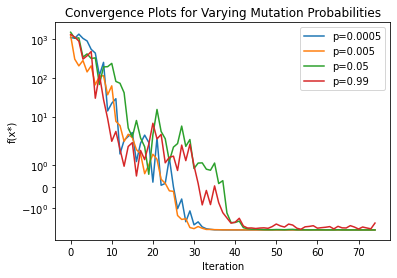

In [6]:
x_lower = [-100,-100]
x_upper = [100,100]
pop_size= 20
MAX_K = 75

mutation_prob = 0.0005
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'p={mutation_prob}')

mutation_prob = 0.005
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'p={mutation_prob}')

mutation_prob = 0.05
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'p={mutation_prob}')

mutation_prob = 0.99
x_star, f_x, convergence = genetic_algorithm(eggshell, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob)
print(x_star, f_x)
plt.semilogy(convergence, label=f'p={mutation_prob}')


plt.xlabel("Iteration")
plt.ylabel("f(x*)")
plt.title(f"Convergence Plots for Varying Mutation Probabilities")
plt.legend(loc="upper right")
plt.yscale('symlog')
plt.show()

[8.825411595273259, -7.173124275848352] 0.8365054474512668


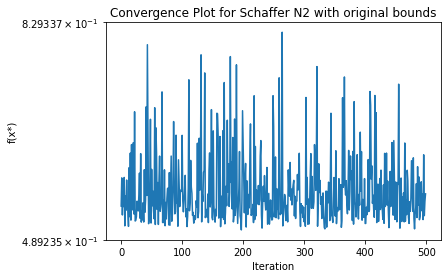

In [7]:
x_lower = [-100,-100]
x_upper = [100,100]

pop_size= 200
MAX_K = 500
mutation_prob = 0.1
max_perturbation = 0.01

x_star, f_x, convergence = genetic_algorithm(schaffer_n2, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob, max_perturbation=max_perturbation)


print(x_star, f_x)
plt.semilogy(convergence)
plt.xlabel("Iteration")
plt.ylabel("f(x*)")
plt.title(f"Convergence Plot for Schaffer N2 with original bounds")
plt.yscale('symlog')
plt.show()

[0.00013628760112835217, -0.008017168364794588] 6.842244304472445e-08


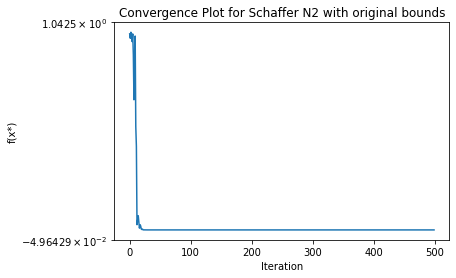

In [8]:
x_lower = [-2,-2]
x_upper = [2,2]

pop_size= 200
MAX_K = 500
mutation_prob = 0.1
max_perturbation = 0.01

x_star, f_x, convergence = genetic_algorithm(schaffer_n2, x_lower, x_upper, pop_size, MAX_K, mutation_prob=mutation_prob, max_perturbation=max_perturbation)


print(x_star, f_x)
plt.semilogy(convergence)
plt.xlabel("Iteration")
plt.ylabel("f(x*)")
plt.title(f"Convergence Plot for Schaffer N2 with original bounds")
plt.yscale('symlog')
plt.show()